# 오늘 배울 것들

- 샘플 데이터(정규분포 숫자들, 날짜) 만들기
- 파이썬 시각화 라이브러리 Seaborn 
- 팁(tips.csv) 데이터 분석 
- 타이타닉호 탑승자 데이터 분석 (Kaggle competition)

In [3]:
# numpy and pandas
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# randn을 이용한 샘플 숫자만들기

In [4]:
# randn(100)하면 정규 분포를 이루는 100개의 수를 샘플링합니다.
from numpy.random import randn

In [5]:
# 평균~0, 표준편차~1인 정규분포 숫자들을 만듭니다.
sample = randn(1000)
sample[:10]

array([ 1.34068594, -1.34466507, -1.536218  , -0.58654898, -0.07770704,
       -0.09618955,  1.72053343,  0.36021243, -0.75043232, -1.28439396])

In [6]:
# 평균입니다.
sample.mean()

0.045401947884484213

In [7]:
# 표준편차입니다.
sample.std()

1.0075006756156746

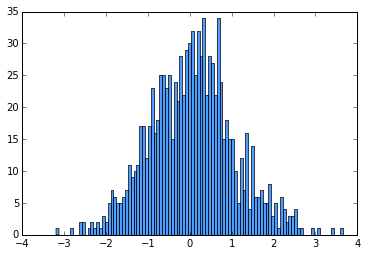

In [53]:
# 히스토그램을 그려봅시다. bins는 bin size를 말합니다.
plt.hist(sample, bins=100, alpha=0.7, color='#0075ff')
plt.show()

### [histogram이란?](http://mathbang.net/72)

도수분포표를 시각화한 것으로, 가로축이 계급(서로 겹치지 않는 변수의 구간), 세로축이 도수를 말합니다.



### 해보기

randn으로 정규분포 숫자를 만들고, histogram을 그려보세요. histogram 2개를 한 번에 그릴 수도 있습니다.

색깔 선택: http://colorpicker.com

In [76]:
# ...

# Pandas를 사용해 Date(날짜) serial을 만들기 

[pandas time series 다큐먼트](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

In [18]:
# 2016년 1월 1일부터 10일
pd.date_range('1/1/2016', periods=10)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# 2016년 1월 1일부터 10달
# freq 옵션으로 M,W,D,H 등을 줄 수 있습니다.
pd.date_range('1/1/2016', periods=10, freq='M')

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31'],
              dtype='datetime64[ns]', freq='M')

# randn과 date_range를 사용하여 plot을 그려봅시다.

In [65]:
# 120달/12달 = 10년치 데이터를 그려봅시다.

ts = pd.Series(randn(120), \
               index=pd.date_range('1/1/2016', periods=120, freq='M'))

In [66]:
ts.head()

2016-01-31   -0.321042
2016-02-29    2.069796
2016-03-31   -0.058212
2016-04-30    0.834742
2016-05-31   -0.836392
Freq: M, dtype: float64

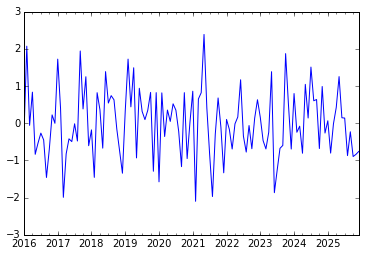

In [68]:
ts.plot()

# Cumsum chart 그리기

In [69]:
arr = np.array([1,2,3,4,5,6,7,8,9,10])

In [70]:
# 합(sum)을 축적(cumulate)합니다.
arr.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

In [74]:
ts[:10]

2016-01-31   -0.321042
2016-02-29    2.069796
2016-03-31   -0.058212
2016-04-30    0.834742
2016-05-31   -0.836392
2016-06-30   -0.532698
2016-07-31   -0.265926
2016-08-31   -0.450134
2016-09-30   -1.459098
2016-10-31   -0.706094
Freq: M, dtype: float64

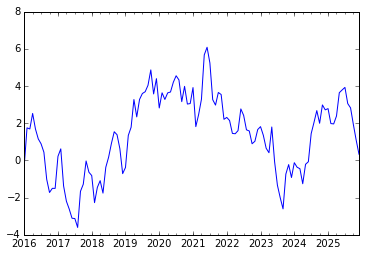

In [72]:
# Cumsum chart 그리기
# 조금 더 방향성(?)있는 차트를 그릴 수 있습니다.
ts.cumsum().plot()

### [Cumsum charts란 무엇인가요?](http://www.public.iastate.edu/~vardeman/asqcourse/cusumcharts.pdf)

# 여러개의 Cumsum Chart를 한 번에 그려봅시다.

In [39]:
# shape은 몇 차원 행렬인지 알려줍니다.
print randn(10,2).shape
print randn(10,2)

(10, 2)
[[ 0.33158133  0.33959702]
 [-0.35689902 -1.38523573]
 [ 0.36431624 -0.54953261]
 [ 0.51709839 -0.61973295]
 [ 1.31477903 -0.52212726]
 [ 0.58709276 -0.24740582]
 [ 0.23421174  0.9279633 ]
 [-1.6023284   0.09352583]
 [ 0.12241297 -0.38720313]
 [-2.05185522  1.01615829]]


In [61]:
df = DataFrame(randn(120,4), \
               index=ts.index, \
               columns=list('ABCD'))
df.head()

,A,B,C,D
2016-01-31,0.404099,-0.706701,0.133476,-1.135178
2016-02-29,0.099451,-0.067149,-1.326843,-1.126800
2016-03-31,-0.697089,-1.802485,-0.955208,-0.142091
2016-04-30,-0.947504,0.470843,-1.230549,-2.515689
2016-05-31,0.637800,2.181932,0.042546,1.126108


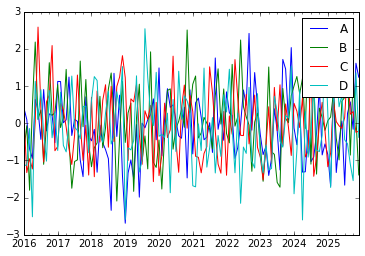

In [62]:
# plt.plot()이 아닌, data frame 객체 자체에서 메소드로 지원합니다.
df.plot()

In [63]:
# cumsum을 하면 데이터가 방향성을 가지게 됩니다.
df = df.cumsum();

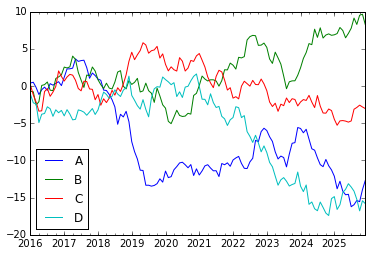

In [64]:
df.plot()

### 해보기

randn으로 총 5개(A,B,C,D,E)의 2016년 주단위(52주) 정규분포 데이터를 생성하고, Cumsum chart를 그려보세요.

In [96]:
# pd.date_range 사용법을 알고 싶을때?
print pd.date_range.__doc__


    Return a fixed frequency datetime index, with day (calendar) as the default
    frequency

    Parameters
    ----------
    start : string or datetime-like, default None
        Left bound for generating dates
    end : string or datetime-like, default None
        Right bound for generating dates
    periods : integer or None, default None
        If None, must specify start and end
    freq : string or DateOffset, default 'D' (calendar daily)
        Frequency strings can have multiples, e.g. '5H'
    tz : string or None
        Time zone name for returning localized DatetimeIndex, for example
    Asia/Hong_Kong
    normalize : bool, default False
        Normalize start/end dates to midnight before generating date range
    name : str, default None
        Name of the resulting index
    closed : string or None, default None
        Make the interval closed with respect to the given frequency to
        the 'left', 'right', or both sides (None)

    Notes
    -----
    2 of st

# Doc strings

In [97]:
# 어떤 메소드에 대한 설명을 보고 싶을땐 
# 메소드.__doc__을 프린트 찍어보세요.

print DataFrame.__doc__

 Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure

    Parameters
    ----------
    data : numpy ndarray (structured or homogeneous), dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects
    index : Index or array-like
        Index to use for resulting frame. Will default to np.arange(n) if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        np.arange(n) if no column labels are provided
    dtype : dtype, default None
        Data type to force, otherwise infer
    copy : boolean, default False
        Copy data from inputs. Only affects DataFrame / 2d ndarray input

    Examples
    ---

In [98]:
# 직접 doc strings을 만들어봅시다.
# 구글에서 제안하는 파이썬 스타일 가이드를 참고해보세요.
# https://google.github.io/styleguide/pyguide.html#comments

def hello(word):
    """This function print parameter word
    
    Args:
        word: ...
    
    Returns:
        text: ...
        
    Examples:
        >>> hello('world!')
    """
    text = 'Hello, ' + word
    print text

In [99]:
print hello.__doc__

This function print parameter word
    
    Args:
        word: ...
    
    Returns:
        text: ...
        
    Examples:
        >>> hello('world!')
    


# Seaborn

Seaborn은 matplotlib을 기반으로 하는 파이썬 시각화 라이브러리입니다. matplotlib을 더 쉽게 활용할 수 있는 high level 인터페이스를 제공합니다.

Source code는 [github](https://github.com/mwaskom/seaborn)에서 직접 확인하실 수 있습니다. 설치는 아래와 같이 pip로 설치해주세요.

```
> pip install seaborn
```

In [100]:
# seaborn을 import하는 순간부터 
# 기본 matplotlib 디자인도 바뀌기 시작합니다.
import seaborn as sns

# Load Sample Data

In [101]:
# Seaborn 패키지에서 샘플 데이터를 제공합니다.
# load_dataset 메소드를 사용합니다.
print sns.load_dataset.__doc__

Load a dataset from the online repository (requires internet).

    Parameters
    ----------
    name : str
        Name of the dataset (`name`.csv on
        https://github.com/mwaskom/seaborn-data).  You can obtain list of
        available datasets using :func:`get_dataset_names`
    cache : boolean, optional
        If True, then cache data locally and use the cache on subsequent calls
    data_home : string, optional
        The directory in which to cache data. By default, uses ~/seaborn_data/
    kws : dict, optional
        Passed to pandas.read_csv

    


In [165]:
# tips.csv를 가져오면, 누가 언제 얼마의 tip을 주었는지에 대한 정보가 있습니다.
# 이제부터 식당의 알바생이라고 생각하고, 언제 알바를 하고 누구에게 서빙을 해야하는지 
# 데이터 감각을 살려보도록 합시다.
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


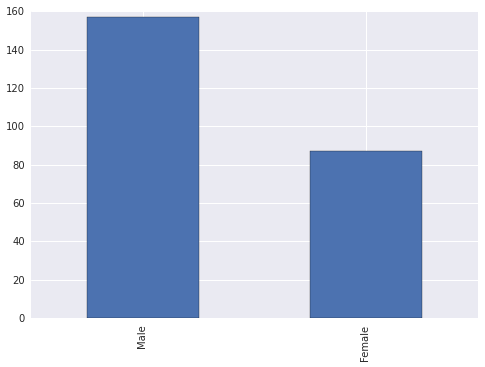

In [166]:
# 팁을 남자가 많이 주는지 여자가 많이 주는지 남녀수를 count하여 bar 차트를 그려봅시다.

# 지난 시간에 배운 방법입니다. 여자보단 남자.
tips_df['sex'].value_counts().plot(kind='bar')

### factorplot으로 그리기

[factor plot 다큐먼트](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html)

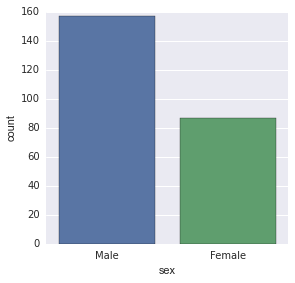

In [167]:
# seaborn factorplot(kind='count')을 활용한 방법입니다.
sns.factorplot('sex', data=tips_df, kind='count')

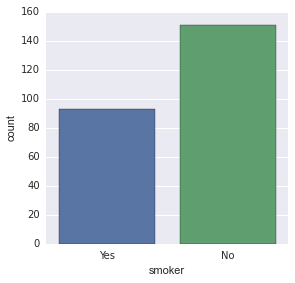

In [126]:
# 흡연자보단 비흡연자
sns.factorplot('smoker', data=tips_df, kind='count')

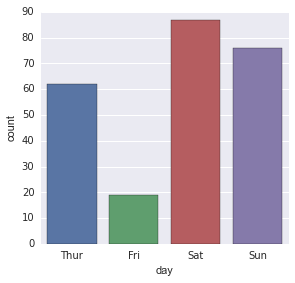

In [127]:
# 토요일 > 일요일 > 목요일 > 금요일
sns.factorplot('day', data=tips_df, kind='count')

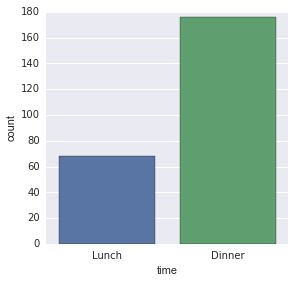

In [156]:
# 점심보단 저녁
sns.factorplot('time', data=tips_df, kind='count')

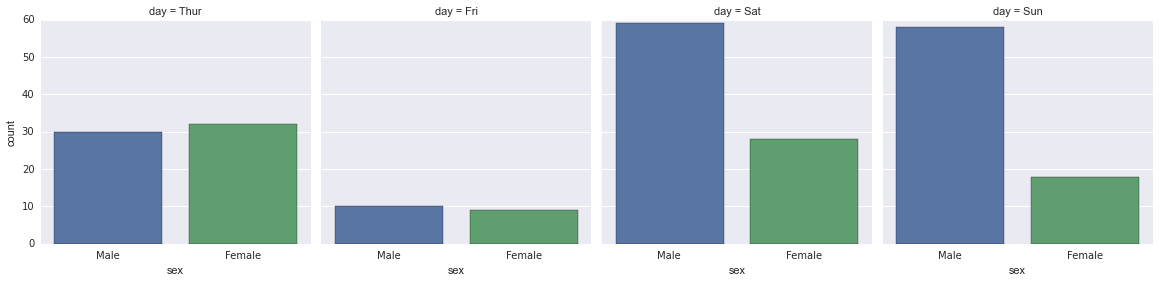

In [181]:
# [질문] 요일별로/성별로 팁을 주는 사람들은 얼마나 있었을까요?
sns.factorplot(x='sex', data=tips_df, kind='count', col='day')

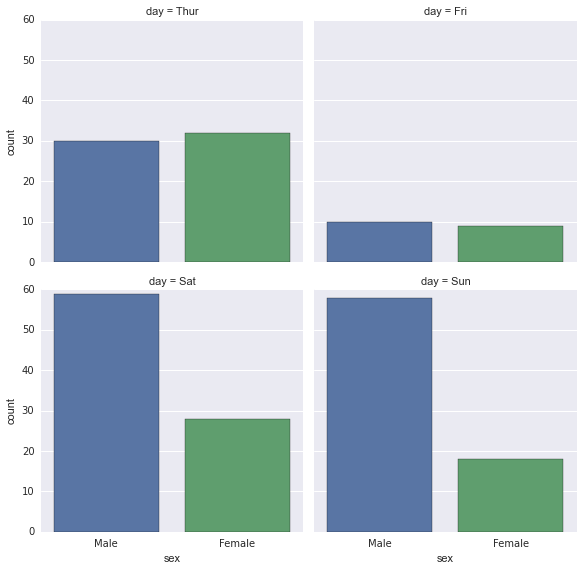

In [184]:
# col_wrap으로 개수 제한을 둘 수 있습니다.
sns.factorplot(x='sex', data=tips_df, kind='count', col='day', col_wrap=2)

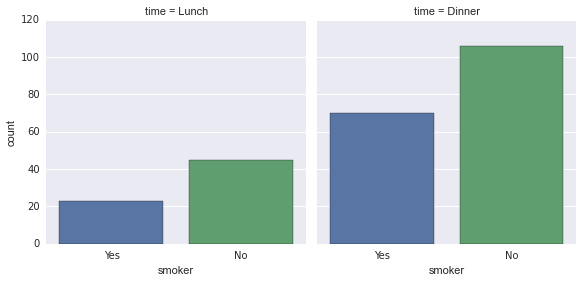

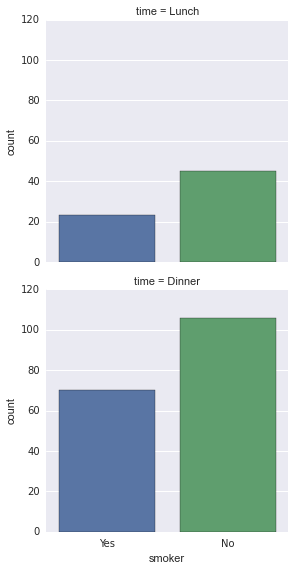

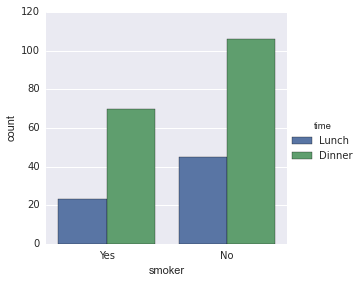

In [150]:
# [질문] 시간대별/흡엽여부별로 팁을 주는 사람은 얼마나 있었을까요?
sns.factorplot(x='smoker', data=tips_df, kind='count', col='time')
sns.factorplot(x='smoker', data=tips_df, kind='count', row='time')
sns.factorplot(x='smoker', data=tips_df, kind='count', hue='time')

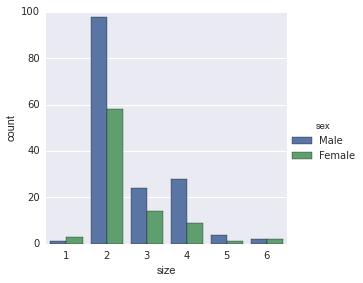

In [185]:
# 남자든 여자든 둘일때 팁을 주는 경우가 가장 많군요.
sns.factorplot('size', data=tips_df, kind='count', hue='sex', order=[1,2,3,4,5,6])

### 해보기

어떤 테이블에 가야 팁을 받을 확률이 높을까요?

In [ ]:
# ...

### 계속 해봅시다. 

이제, 얼마를 주는지도 알아봐야 할 것 같습니다!

[pointplot에 대하여](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pointplot.html?highlight=pointplot#seaborn.pointplot)

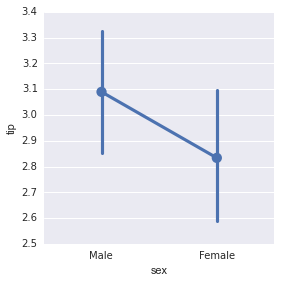

In [199]:
# 팁은 남자가 더 많이 주네요 ㅎㅎ
sns.factorplot(x="sex", y="tip", data=tips_df)

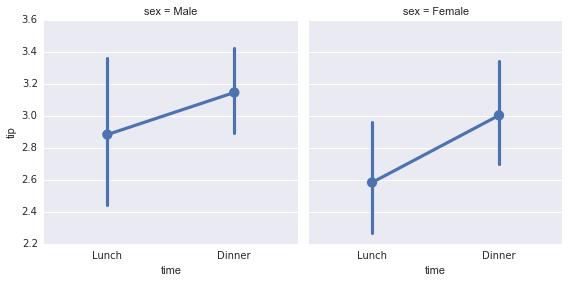

In [206]:
# 남자든 여자든 확실히 저녁에 많은 팁을 주는군요!
sns.factorplot(x="time", y="tip", data=tips_df, col='sex')

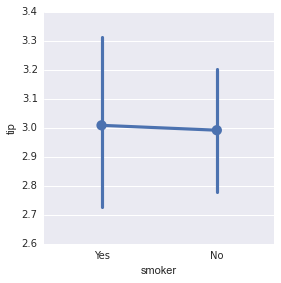

In [204]:
# 흡연 여부는 팁의 금액과 그닥 큰 차이를 보이진 않네요.
sns.factorplot(x="smoker", y="tip", data=tips_df)

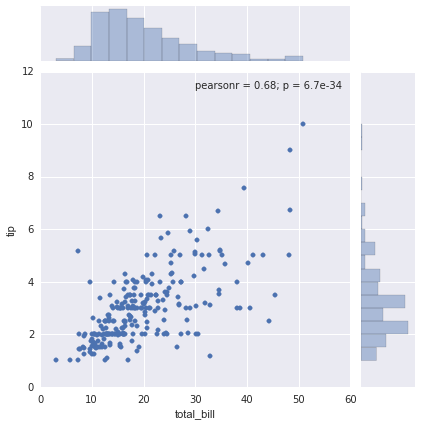

In [207]:
# 금액에 비례하여 팁은 주긴하는군요
sns.jointplot(tips_df['total_bill'],tips_df['tip'])

# 타이타닉 프로젝트

지금까지 배운 파이썬 기본 내용과 Pandas, Seaborn을 활용하여, 타이타닉 생존자를 예측해봅시다.

[데이터 다운로드](https://www.kaggle.com/c/titanic/data)

데이터에 대한 설명: https://www.kaggle.com/c/titanic

---

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

In [214]:
# seaborn 다듬어진 데이터셋이 들어있긴 하지만.. 학습목적을 위해 원본 데이터를 사용하겠습니다.
sns.load_dataset('titanic').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


![](http://www.cruise4u.co.uk/images/cruise_liner_decks.gif)

![](https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png)

In [368]:
# Data를 받아옵니다.
import pandas as pd
from pandas import Series, DataFrame

# data를 읽어옵시다. 
# sns load data에도 titanic 데이터가 내장되어 있지만, 데이터 포맷이 조금 달라 해당 csv 파일로 진행하겠습니다.
titanic_df = pd.read_csv("./data/titanic_data.csv")

In [369]:
# 찍어봅시다.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [370]:
# 총 891명에 대한 정보가 있고, Age 정보는 없는 경우가 많군요.. 
# Cabin(선실) 정보도 많이 없습니다.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [371]:
# 숫자 데이터에 대한 요약입니다.
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 해보기: Data를 조금 더 다루기 용이한 상태로 바꿔봅시다.
1. embark_town에 약자들을 (C = Cherbourg; Q = Queenstown; S = Southampton)로 바꿉시다.
2. survived 0,1을 이용하여 새로운 alive 컬럼에 no, yes를 넣읍시다.
3. sibsp, parch가 둘다 0인 사람들은 새로운 alone 컬럼에 True, 아닌 사람들은 False를 기록합시다.
4. pclass 컬럼의 1,2,3을 가지고, 새로운 class 컬럼에 first, second, third를 넣어줍시다.

In [388]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [389]:
sns.load_dataset('titanic').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [395]:
# 일단 원본 데이터는 보존합시다.
df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin']].copy()

In [396]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin
0,0,3,male,22,1,0,7.2500,S,NaN
1,1,1,female,38,1,0,71.2833,C,C85
2,1,3,female,26,0,0,7.9250,S,NaN
3,1,1,female,35,1,0,53.1000,S,C123
4,0,3,male,35,0,0,8.0500,S,NaN


In [422]:
# 1. class: pclass 기준입니다.
# 2. who: 16세 이하는 child로 구분합시다. apply를 이용할 때, sex와 age 변수 두 개를 넘겨줘야합니다.
# 3. adult_male: male만 adult_male True, 나머지는 False
# 4. deck: Cabin의 앞자리 알파벳만 떼어내기 
# 5. embark_town: 풀 네임으로 써주기
# 6. alive: survived(0,1) no, yes
# 7. alone: sibsp+parch이 1이상이면 False, 0이면 True

In [420]:
# apply 변수 2개 이상 넘기기
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

# def get_who(age, sex):
#     print age, sex

# def get_who(info):
#     print info

# df[['age','sex']].apply(get_who)

def get_who(info):
    print info
    pass
   
df[['age','sex']].apply(get_who, axis=1).head()

0    None
1    None
2    None
3    None
4    None
dtype: object

In [473]:
# drop할때도 axis=1
df.drop('cabin',axis=1,inplace=True)

In [476]:
# column 소문자로 바꾸기
df.columns = map(str.lower, df.columns)

# 우리가 던져야 할 질문 몇가지..
생존에 영향이 있었을 것 같은 요소들과 생존과의 상관 관계를 조사해봅니다.

1. 누가 타이타닉호에 타고 있었나 (성별, 나이, Class 등)
2. 어떤 deck에서 탔고, 그것이 class와 관련이 있는가
3. 승객들은 어디서(Embarked) 탔는가
4. 누가 혼자이고, 누가 가족이 있는가
5. **어떠한 요소가 생존에 영향을 미쳤는가**

### 1. 누가 타이타닉호에 타고 있었나 (성별, 나이, Class 등)

In [483]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [485]:
titanic_data = df

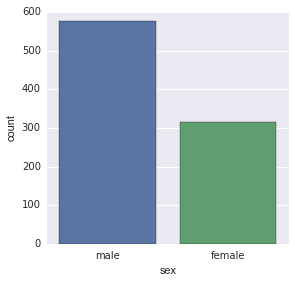

In [486]:
# 음 남자가 훨씬 많았네요
sns.factorplot('sex', data=titanic_data, kind='count')

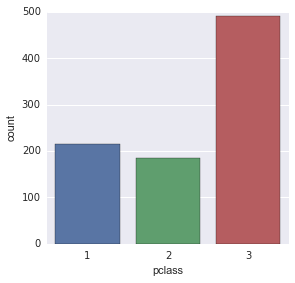

In [487]:
# 3등급 칸에 사람이 많군요. 순서 변경은 order 옵션을 사용합니다.
sns.factorplot('pclass', data=titanic_data, \
               kind='count', order=[1,2,3])

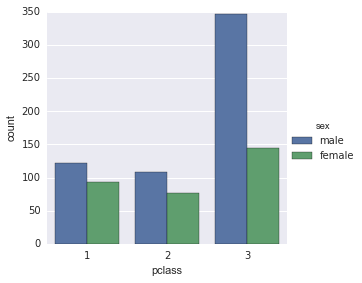

In [488]:
# 음.. 3등급 칸에는 남자가 확실히 많군요. 
sns.factorplot('pclass', data=titanic_data, kind='count', hue='sex', order=[1,2,3])

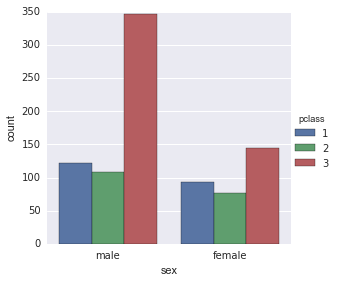

In [489]:
# 위에 그래프와 같으면서도 다른 느낌~ hue_order 옵션도 있습니다.
# sns.set_style('ticks') # one of {darkgrid, whitegrid, dark, white, ticks}
sns.factorplot('sex', data=titanic_data, \
               kind='count', hue='pclass', hue_order=[1,2,3])

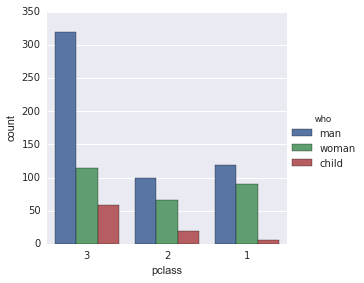

In [490]:
sns.factorplot('pclass', data=titanic_data, kind='count', hue='who', order=[3,2,1])

음 3등급칸에 아이들이 많군요.. 이번에는 histogram을 사용하여 타이타닉호의 나이대 분포를 한 번 볼까요?

### histogram이란?

(array([ 0.00294317,  0.00588634,  0.01765901,  0.03531802,  0.05297703,
         0.08829505,  0.21485129,  0.29431683,  0.40027089,  0.42087307,
         0.37083921,  0.3531802 ,  0.25605564,  0.17070376,  0.12655624,
         0.05886337,  0.0559202 ,  0.01471584,  0.        ,  0.00294317]),
 array([-3.41688113, -3.07711123, -2.73734133, -2.39757143, -2.05780154,
        -1.71803164, -1.37826174, -1.03849184, -0.69872195, -0.35895205,
        -0.01918215,  0.32058775,  0.66035764,  1.00012754,  1.33989744,
         1.67966734,  2.01943723,  2.35920713,  2.69897703,  3.03874693,
         3.37851682]),
 <a list of 20 Patch objects>)

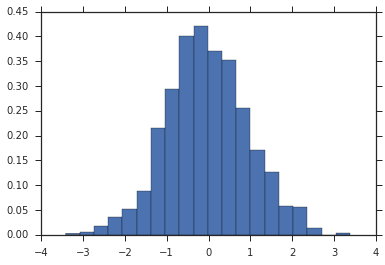

In [92]:
# randn을 사용해 샘플 데이터를 생성합시다. normed 옵션은 분포를 정규화시키는 옵션입니다.
dataset1 = randn(1000)
plt.hist(dataset1, normed=True, bins=20)

(array([ 0.01685498,  0.01685498,  0.03370995,  0.08708404,  0.12922148,
         0.21630553,  0.23877883,  0.40451943,  0.40451943,  0.3989011 ,
         0.36519115,  0.20787804,  0.15731311,  0.06461074,  0.04213744,
         0.01404581,  0.00561833,  0.        ,  0.00280916,  0.00280916]),
 array([-3.02888607, -2.67290811, -2.31693016, -1.9609522 , -1.60497424,
        -1.24899629, -0.89301833, -0.53704037, -0.18106241,  0.17491554,
         0.5308935 ,  0.88687146,  1.24284941,  1.59882737,  1.95480533,
         2.31078329,  2.66676124,  3.0227392 ,  3.37871716,  3.73469511,
         4.09067307]),
 <a list of 20 Patch objects>)

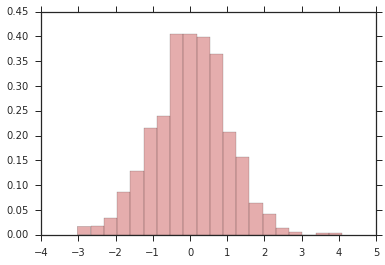

In [93]:
dataset2 = randn(1000)
plt.hist(dataset2, normed=True, color='indianred', alpha=0.5, bins=20)

(array([ 0.01685498,  0.01685498,  0.03370995,  0.08708404,  0.12922148,
         0.21630553,  0.23877883,  0.40451943,  0.40451943,  0.3989011 ,
         0.36519115,  0.20787804,  0.15731311,  0.06461074,  0.04213744,
         0.01404581,  0.00561833,  0.        ,  0.00280916,  0.00280916]),
 array([-3.02888607, -2.67290811, -2.31693016, -1.9609522 , -1.60497424,
        -1.24899629, -0.89301833, -0.53704037, -0.18106241,  0.17491554,
         0.5308935 ,  0.88687146,  1.24284941,  1.59882737,  1.95480533,
         2.31078329,  2.66676124,  3.0227392 ,  3.37871716,  3.73469511,
         4.09067307]),
 <a list of 20 Patch objects>)

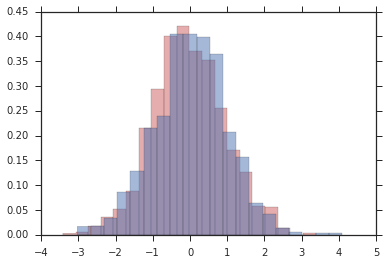

In [94]:
plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20)

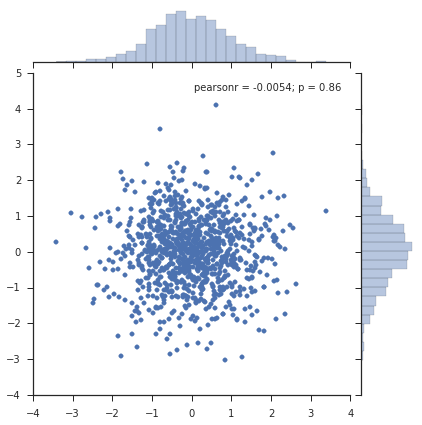

In [99]:
# seaborn에서 제공하는 joinplot으로 두개의 히스토그램을 합하여 빈도수를 확인할 수 있습니다.
# 정규분포니까 가운데 몰려있겠죠?
sns.jointplot(dataset1,dataset2)

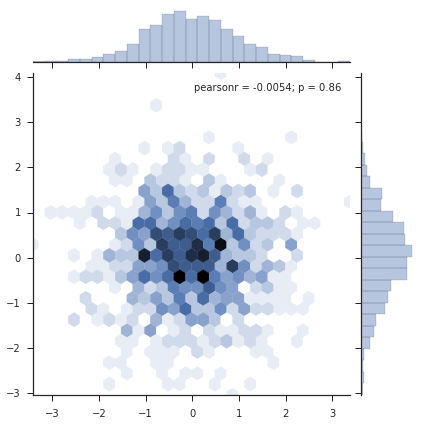

In [100]:
# point가 아닌 hex(육각형)으로 만들 수 있습니다.
sns.jointplot(dataset1,dataset2,kind='hex')

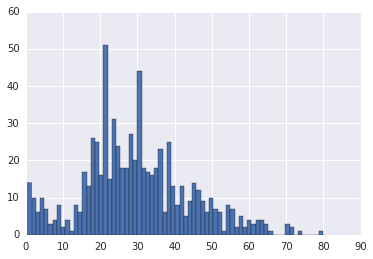

In [491]:
# 타이타닉 탑승자 나이 분포
titanic_data['age'].hist(bins=70)

음.. 20-30대가 확실히 많군요. 신생아도 많네요.

### 2. 승객들은 어떤 deck에서 탔고, 그것이 class와 관련이 있는가

In [508]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embarked_town,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,SS,NaN
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,CC,C
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,SS,NaN
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,SS,C
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,SS,NaN


In [509]:
cabin_df = DataFrame(titanic_data['deck'].dropna())

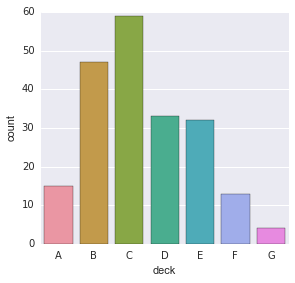

In [511]:
sns.factorplot('deck', data=cabin_df, kind='count')

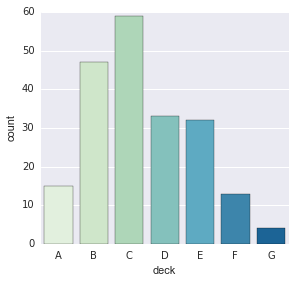

In [512]:
# http://matplotlib.org/users/colormaps.html
# _d를 붙이면 더 어두운 색이 나옵니다.
sns.factorplot('deck', data=cabin_df, kind='count', \
               palette='GnBu', order=list('ABCDEFG')) # T 생략

### 3. 승객들은 어디서 탔는가

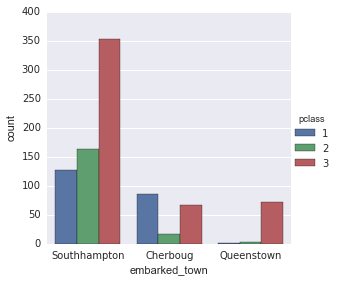

In [516]:
sns.factorplot('embarked_town', data=titanic_data, hue='pclass', hue_order=[1,2,3], \
               kind='count')

Southhampton의 경제적 지표가 될 수도 있겠네요..

### 4. 누가 혼자이고, 누가 가족이 있는가

In [520]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embarked_town,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southhampton,With Family
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherboug,With Family
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southhampton,Alone
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southhampton,With Family
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southhampton,Alone


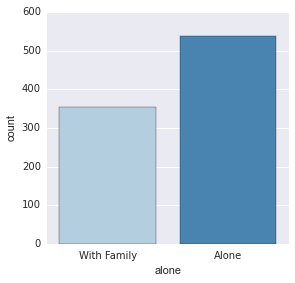

In [521]:
sns.factorplot('alone', data=titanic_data, palette='Blues', kind='count')

### 5. 어떠한 요소가 생존에 영향을 미쳤는가

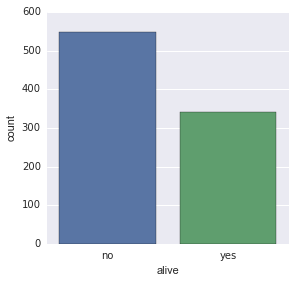

In [523]:
# map 사용해서 새로운 column 추가하기
titanic_data['alive'] = titanic_data.survived.map({0: "no", 1:"yes"})

sns.factorplot('alive', data=titanic_data, kind='count')

음, 확실히 생존자보다는 사망자가 많군요. Pclass와 생존여부 관계를 알아봅시다. 

3등급 승객들이 더 많이 사망하였을까요? 아니면 1등급 승객들이 더 많이 사망하였을까요?

### 요소들간 상관관계 보기

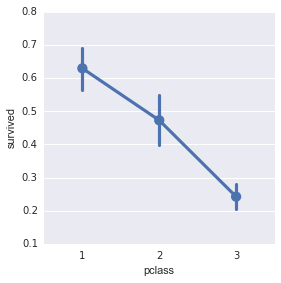

In [524]:
# 첫번째가 x축, 두번째가 y축을 이루게 됩니다. 순서가 중요하지요.
sns.factorplot('pclass', 'survived', data=titanic_data, order=[1,2,3])

음.. 확실히 3등급 승객들이 많이 사망하긴 했는데, 3등급 승객 중 남자가 많았던 것 기억하시나요? 혹시 그것때문에 그런 것은 아니었을까요?

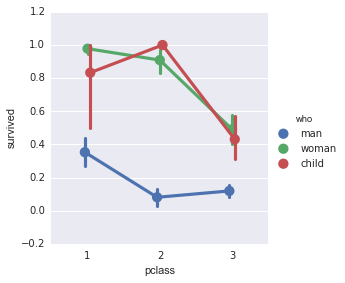

In [526]:
# dodge를 하면 겹치지 않고 살짝 옆으로 그립니다.
sns.factorplot('pclass', 'survived', hue='who', data=titanic_data, order=[1,2,3], dodge=True)

이렇게 보니, 객실 등급도 영향이 있긴 했지만, 남자, 여자, 아이들도 영향이 있었군요. 오히려 남자는 2등급 객실에서 더 많이 사망했네요.. 음..

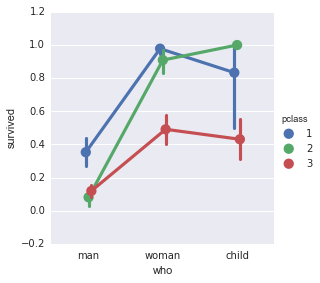

In [527]:
sns.factorplot('who', 'survived', hue='pclass', data=titanic_data, dodge=True, hue_order=[1,2,3])

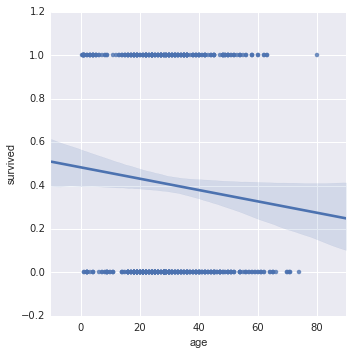

In [528]:
# linear plot을 그려서 trend(경향)을 살펴봅시다.
sns.lmplot('age','survived',data=titanic_data)

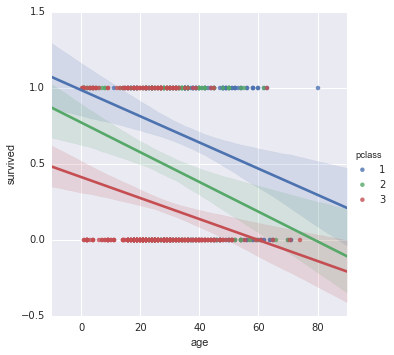

In [529]:
sns.lmplot('age','survived', hue='pclass', \
           data=titanic_data, hue_order=[1,2,3])

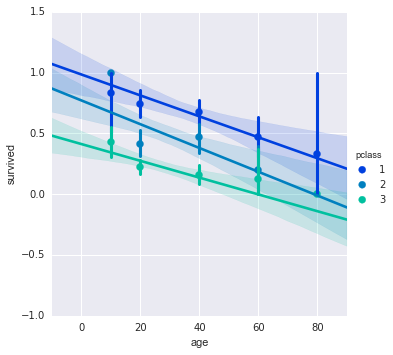

In [530]:
# grouping..
generations=[10,20,40,60,80]
sns.lmplot('age','survived',hue='pclass',\
           data=titanic_data,palette='winter',\
           x_bins=generations, hue_order=[1,2,3])

나이 많은 1등급 객실 사람들 데이터가 흥미로운 발견이군요..

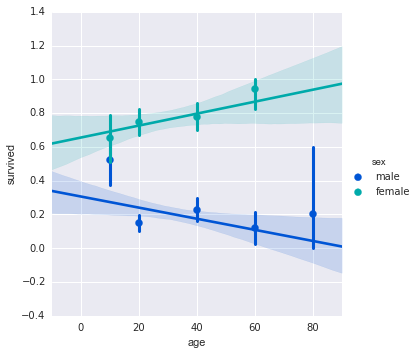

In [531]:
sns.lmplot('age','survived', hue='sex', \
           data=titanic_data, palette='winter', x_bins=generations)

### 해보기

자, 지금까지 성별, 나이, 클래스과 생존률간의 어떤 관계가 있는지 알아보았습니다. 스스로 몇가지 질문에 답해보는 시간을 가집시다.

1. deck이 어디였느냐에 따라서 생존율에 영향을 미쳤을까요?
2. family member가 있고 없냐에 따라 생존율이 달라졌을까요?

In [538]:
# ...

![](http://www.voyance-aline.me/upload/1.bp.blogspot.com/-E4r73C2lSyw/UFDGu4_9jBI/AAAAAAAAANc/ao7fY_fLotQ/s1600/TITANIC.jpg)

In [539]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')

앞으로 갈 길이 조금 더 있긴 하지만.. test.csv 데이터를 받아서 생존율을 예측해보세요.

https://www.kaggle.com/c/titanic/submit

<div style='text-align:center;'>

<br/>
<br/>
================= 2016년 파이썬 8주 강의 끄읕-- 감사합니다 =================
<br/>

</div>